In [2]:
import earthaccess
import pandas as pd
import xarray as xr

In [2]:
auth = earthaccess.login()

EARTHDATA_USERNAME and EARTHDATA_PASSWORD are not set in the current environment, try setting them or use a different strategy (netrc, interactive)
You're now authenticated with NASA Earthdata Login
Using token with expiration date: 08/18/2023
Using .netrc file for EDL


In [ ]:
results = earthaccess.search_data(
    short_name='OSCAR_L4_OC_FINAL_V2.0',
    cloud_hosted=True,
    bounding_box = (60, 5, 80, 25),
    temporal=("2000-01", "2020-0")
)

In [3]:
# grab 1 granule every month of the dataset

granules = []

count = 1
for year in range(2000, 2021):
    for month in range(1, 13):
        granule = earthaccess.granule_query().short_name("OSCAR_L4_OC_FINAL_V2.0").temporal(f'{year}-{month}-01',f'{year}-{month}-02').get(1)
        print(count, end=" ")
        count +=1
        if len(granule)>0:
            granules.append(granule[0])
        

print(len(granules))

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 252


In [5]:
files = earthaccess.download(granules, "./surface_currents/")

 Getting 252 granules, approx download size: 0.0 GB


SUBMITTING | :   0%|          | 0/252 [00:00<?, ?it/s]

PROCESSING | :   0%|          | 0/252 [00:00<?, ?it/s]

COLLECTING | :   0%|          | 0/252 [00:00<?, ?it/s]

# Examine files

In [3]:
f1 = xr.open_dataset('surface_currents/oscar_currents_final_20000101.nc')
f1

<xarray.Dataset>
Dimensions:  (latitude: 719, longitude: 1440, time: 1)
Coordinates:
    lat      (latitude) float64 ...
    lon      (longitude) float64 ...
  * time     (time) object 2000-01-01 00:00:00
Dimensions without coordinates: latitude, longitude
Data variables:
    u        (time, longitude, latitude) float64 ...
    v        (time, longitude, latitude) float64 ...
    ug       (time, longitude, latitude) float64 ...
    vg       (time, longitude, latitude) float64 ...
Attributes: (12/36)
    title:                      Ocean Surface Current Analyses Real-time (OSC...
    summary:                    Global, daily, 0.25 degree geostrophic and to...
    keywords:                   ocean currents,ocean circulation,surface curr...
    Conventions:                CF-1.8 Standard Names v77, ACDD-1.3, netcdf 4...
    id:                         OSCAR_L4_OC_FINAL_V2.0
    history:                    OSCAR 0.25 degree daily version 2.0 replaces ...
    ...                         ...
    geospatial_lon_max:         359.75
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  0.25 degree
    time_coverage_start:        2000-01-01T00:00:00
    time_coverage_end:          2000-01-01T23:59:59
    date_created:               2022-01-07

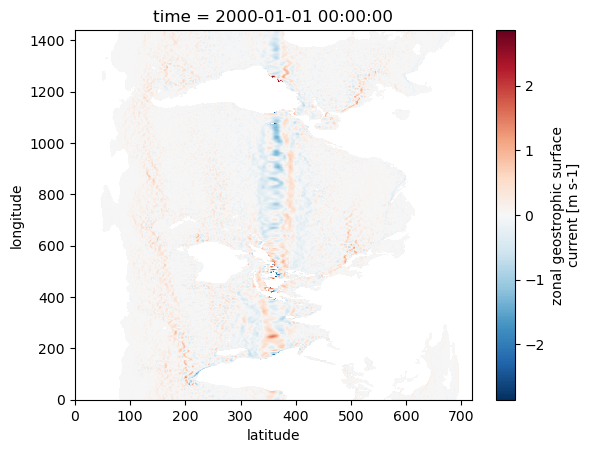

In [4]:
f1['ug'].isel(time=0).plot.imshow()

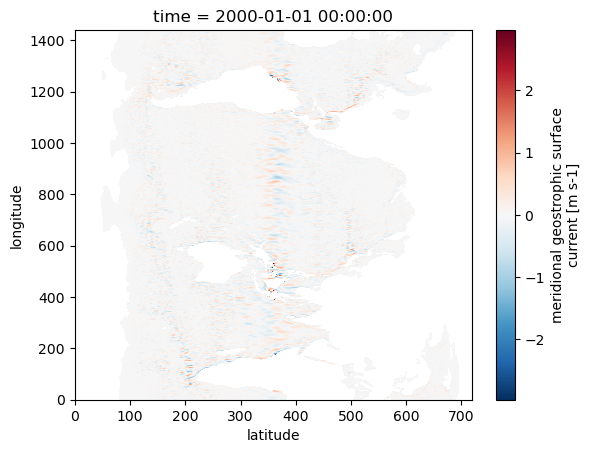

In [5]:
f1['vg'].isel(time=0).plot.imshow()

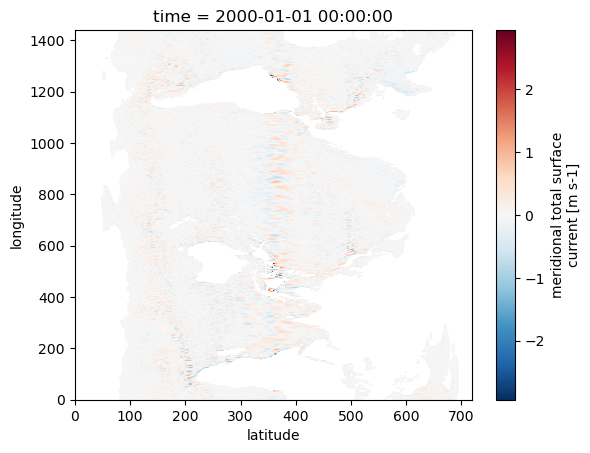

In [12]:
f1['v'].isel(time=0).plot.imshow()